# Implemetation of Polynomial Regression


'''
Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) 
as nth degree polynomial. The Polynomial Regression equation is given below:

y= b0+b1x1+ b2x12+ b2x13+...... bnx1n

The need of Polynomial Regression in ML can be understood in the below points:

1. If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, 
then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.

2. So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. 
We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.

The goal of polynomial regression is to model a non-linear relationship between the independent and dependent variables 
(technically, between the independent variable and the conditional mean of the dependent variable).

'''

![](machine-learning-polynomial-regression.png)

![](eq.png)

In [ ]:
# One Independent and one dependent in linear regression
# more than one independent and one dependent in multiple regression
# one independent followed by degree and one dependent in polynomial regression
# Polynomial regression reduces the errors,
# or it minimizes the errors compared to linear and multiple regression.

# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
dataset = pd.read_csv ('position_salaries.csv')
X = dataset.iloc[:, 1:2].values # level as a independent value
y = dataset.iloc[:, 2].values # salary as dependent value

In [ ]:
print (dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
print (X)
print (y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=8)
print (X_train)
print (X_test)
print (y_train)
print (y_test)

[[10]
 [ 1]
 [ 3]
 [ 6]
 [ 8]
 [ 2]
 [ 5]
 [ 4]]
[[9]
 [7]]
[1000000   45000   60000  150000  300000   50000  110000   80000]
[500000 200000]


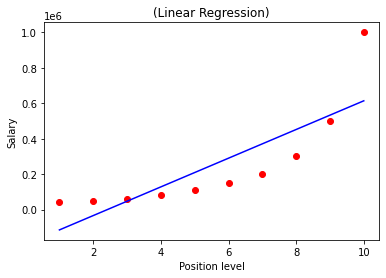

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

![](pr7.png)

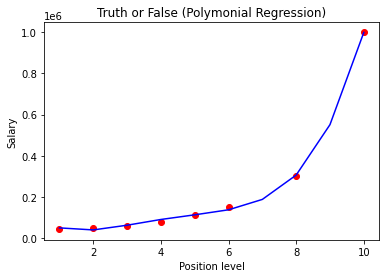

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures 
#Use this class to define the polynomial of the independent variable

poly_reg = PolynomialFeatures(degree=4) #defining the polynomial degree to the feature
X_poly = poly_reg.fit_transform(X_train) 
# X contains the values of independent variable and it transform as per the polynomial
# which contains the values of indepedent variables values folllowed by degree
# Fitting the model followed by the independent varibale which supports the polynomial degree
# we get the new independent values in terms of degree
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train) 
# our model will be fit towards the polynomial based values of the independent variables

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or False (Polymonial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [ ]:
print (X)
print (X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]]


In [ ]:
# Predicting a new result with Linear Regression
#y_pred = lin_reg.predict(X_test) # Testing data set
lin_reg.predict([[8]]) 
# we will get the big difference between our predicted salary because of huge amount of errors

array([451696.96969697])

In [ ]:
accuracy = lin_reg.score(X_test,y_test)
print(accuracy*100,'%')

32.799930619324556 %


In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[8]]))

#  Now we are getting the salary of the employee at level 5.5 which is close to 5 level
# This is the reason we are using polynomial regression  

array([305783.51262385])